# KDSP - Twitter Data Analysis
Name: Marius Hauenstein

Matriculation Number: 3178081

In Project 5 "Twitter Data Analysis", data from Twitter need to be fetched from a specific event, e.g. #football.
1. Derive the sentiment of each tweet using Python module
2. Top 10 hashtags and users based on their number of tweets in the data set
3. Get the followers of a given twitter user from your acquired data set
4. Given a twitter user, obtain the tweets and profiles of all followers of the user and show it.

In [9]:
# choose a specific event
event = '#NFLDraft'
# maximum count of followers
follower_count = 10
# maximum count of tweets per user
tweet_count = 10

- Access the Twitter API with tweepy

In [10]:
import yaml
import tweepy

# load the credential data from yaml file
def processYaml(credentials):
    try:
        with open(credentials) as c:
            return yaml.safe_load(c)
    except:
        print("YAML file corrupted!")



# extract consumer key and secret
def createKeys(access_data):
    return access_data["twitter_api"]["consumer_key"], access_data["twitter_api"]["consumer_secret"]


# get access to the Twitter API
def twitterAuth(consumer_key, consumer_secret):
    try:
        auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)
        api = tweepy.API(auth, wait_on_rate_limit=True)
        return api
    except:
        print("Invalid access data!")

access_data = processYaml("credentials.yaml")
consumer_key, consumer_secret = createKeys(access_data)
api = twitterAuth(consumer_key, consumer_secret)

- load Tweets for chosen event

In [11]:
import numpy as np
import pandas as pd

#format output of pandas DataFrame
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', 50)

# search for 100 results of search item
def twitterSearch(api, search_item):
    search_results = api.search(q=search_item, lang='en', count='100', tweet_mode='extended', wait_on_rate_limit='True')
    return search_results

# get tweets for the chosen event
tweets = twitterSearch(api, event)
# extract the text of the tweets into a pandas Dataframe
df_tweets = pd.DataFrame([tweet.full_text for tweet in tweets], columns=['Tweets'])
# etract the screen name of the tweets
df_tweets['Screen_Name'] = np.array([tweet.user.screen_name for tweet in tweets])

# output pandas Dataframe
df_tweets


,Tweets,Screen_Name
0,RT @JCaporoso: 🚨 New Badlands! 🚨\n\n@ConnorJRo...,Willpa11
1,RT @FanalystsFB: Do you see Jaylen Waddle bein...,NimblewNumbers
2,RT @NFLDraftBible: 🚨TSOF: Part CCXXIII - 6/10/...,PreacherBoyRoy
3,Yesterday's report regarding Deshaun Watson wa...,First_N_Goal1
4,🚨 New Badlands! 🚨\n\n@ConnorJRogers Thursday T...,JCaporoso
...,...,...
95,RT @OhGeezFootball: 🔥Oh Geez Football🔥\n \n#N...,bmoneylifestyle
96,Check out EME.Liltate's video! #TikTok https:/...,Eddajay
97,RT @NFLCanada: O Canada 🇨🇦\n\nA record-tying 4...,FabrimoLouis
98,"RT @ojhodgkinson: I wrote a romantic novel, so...",ian_cummings_9


1. Derive the sentiment of each tweet using Python module

In [12]:
import re
from textblob import TextBlob

# Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Remove @mentions
    text = re.sub(r'#', '', text)  # Remonving the '#' symbol
    text = re.sub(r'RT[\s]: ', '', text)  # Removing RT
    text = re.sub(r'https?:\/\/\S+', '', text)  # Remove the hyper link

    return text

# get the polarity of each tweet
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# categorize into negative, neutral and positive polarity
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

# clean the Text of links, #, ...
df_tweets['Tweets_Sentiment'] = df_tweets['Tweets'].apply(cleanTxt)
# get the Polarity of tweets
df_tweets['Polarity'] = df_tweets['Tweets_Sentiment'].apply(getPolarity)
# categorize the result of polarity analysis
df_tweets['Analysis'] = df_tweets['Polarity'].apply(getAnalysis)
# output the dataframe
df_tweets

,Tweets,Screen_Name,Tweets_Sentiment,Polarity,Analysis
0,RT @JCaporoso: 🚨 New Badlands! 🚨\n\n@ConnorJRo...,Willpa11,🚨 New Badlands! 🚨\n\n Thursday Thoughts! \n\n🏈...,0.106534,Positive
1,RT @FanalystsFB: Do you see Jaylen Waddle bein...,NimblewNumbers,"Do you see Jaylen Waddle being a 1,000 yard re...",0.000000,Neutral
2,RT @NFLDraftBible: 🚨TSOF: Part CCXXIII - 6/10/...,PreacherBoyRoy,🚨TSOF: Part CCXXIII - 6/10/21 (Thursday)\n\n🔹 ...,0.000000,Neutral
3,Yesterday's report regarding Deshaun Watson wa...,First_N_Goal1,Yesterday's report regarding Deshaun Watson wa...,0.025000,Positive
4,🚨 New Badlands! 🚨\n\n@ConnorJRogers Thursday T...,JCaporoso,🚨 New Badlands! 🚨\n\n Thursday Thoughts! \n\n🏈...,0.106534,Positive
...,...,...,...,...,...
95,RT @OhGeezFootball: 🔥Oh Geez Football🔥\n \n#N...,bmoneylifestyle,🔥Oh Geez Football🔥\n \nNFLTwitter NFL NFLDra...,0.800000,Positive
96,Check out EME.Liltate's video! #TikTok https:/...,Eddajay,Check out EME.Liltate's video! TikTok 🤣🤣🤣🤣🤣😭c...,0.000000,Neutral
97,RT @NFLCanada: O Canada 🇨🇦\n\nA record-tying 4...,FabrimoLouis,O Canada 🇨🇦\n\nA record-tying 4️⃣ Canadians we...,0.000000,Neutral
98,"RT @ojhodgkinson: I wrote a romantic novel, so...",ian_cummings_9,"I wrote a romantic novel, sorry I mean scoutin...",-0.203125,Negative


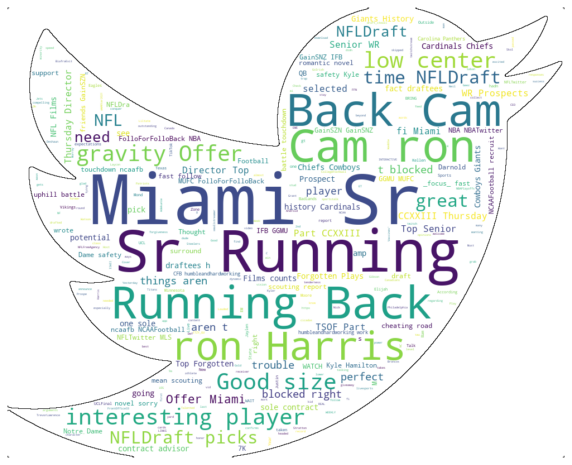

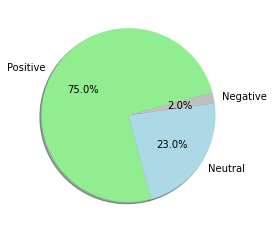

In [13]:
# visualization of sentiment analysis

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image

# read the mask image
# image taken from https://www.pngaaa.com/detail/4852757
twitter_mask = np.array(Image.open("twitter_icon.png"))

# create wordCloud object
wordCloud = WordCloud(background_color="white", max_words=2000, mask=twitter_mask, contour_width=1)

# generate word cloud
wordCloud.generate(' '.join(df_tweets['Tweets_Sentiment']))

# display wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# get value counts of positive, negative and neutral tweets
tweet_Analysis = df_tweets['Analysis'].value_counts()

# allocate colors for categories
colors = {'Positive': 'lightgreen',
        'Negative': 'silver',
        'Neutral': 'lightblue'}

# show pie chart of polarity distribution
plt.pie(tweet_Analysis, colors=[colors[key] for key in tweet_Analysis.index],
        autopct='%1.1f%%', startangle=15, shadow=True, labels=tweet_Analysis.index)
plt.show()

2. Top 10 hashtags and users based on their number of tweets in the data set

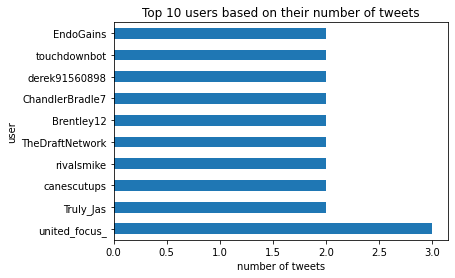

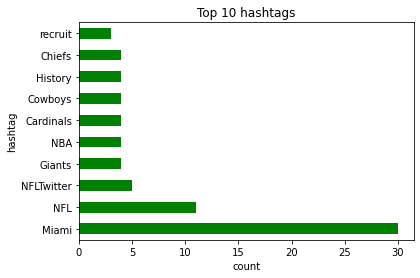

In [14]:
# get hashtag of the data set without initial hashtag
def getHashtags(tweets, event):
    hashtags = []
    for tweet in tweets:
        for hashtag in tweet.entities["hashtags"]:
            if '#' + hashtag['text'].lower() != event.lower():
                hashtags.append(hashtag['text'])
    return hashtags

# Pandas dataframe with top 10 users
df_user = df_tweets['Screen_Name'].value_counts().nlargest(10)

# plot top 10 users with horizontal barchart
df_user_plot = df_user.plot(kind='barh')
plt.title('Top 10 users based on their number of tweets')
plt.xlabel('number of tweets')
plt.ylabel('user')
plt.show()

# Pandas dataframe with top 10 hashtags
df_hashtags = pd.DataFrame(getHashtags(tweets, event), columns=['Hashtags'])
df_hashtags = df_hashtags['Hashtags'].value_counts().nlargest(10)

# plot top 10 hashtags with horizontal barchart
df_hashtags_plot = df_hashtags.plot(kind='barh', color='green')
plt.title('Top 10 hashtags')
plt.xlabel('count')
plt.ylabel('hashtag')
plt.show()

3. Get the followers of a given Twitter user from your acquired data set

In [15]:
# per default the followers of the top user are downloaded
twitter_user = df_user.index[0]

# get the follower of a user
def twitterFollower(api, user, count):
    followers = tweepy.Cursor(api.followers, user).items(count)
    return followers

# get the follower of a user - follower count is defined before
df_follower = pd.DataFrame([follower.id for follower in twitterFollower(api, twitter_user, follower_count)], columns=['follower_id'])
df_follower['name'] = np.array([follower.name for follower in twitterFollower(api, twitter_user, follower_count)])

# print pandas datafrem of follower
print(df_follower)

           follower_id                  name
0  1104763132583575553            I Am Soen.
1  1104701955811799040           Young Yooxy
2           2447188459  Gaganpreetsinghkapoo
3  1101731933350879237    ⚡️𝙐𝙉𝙄𝙏𝙀𝘿 𝙈𝙄𝙉𝘿𝙎𝙀𝙏⚡️
4  1171047032095674368           ACT FAST👀💥👊
5           4113444741               Kinshuk
6           1115527640         ⚫⚪Orton BFR⚫⚪
7   816288972733349889        Stretford Post
8  1153064843353739264         United 4 Life
9  1172371945922297858             u.zu_ちのけん


4. Given a Twitter user, obtain the tweets and profiles of all followers of the user and show it.

In [16]:
from tweepy import TweepError

# print recent tweets of followers
def getFollowersTweets(api, followers, count):
    for follower in followers:
        try:
            statuses = tweepy.Cursor(api.user_timeline, follower).items(count)
            print('\n\n##### ' + str(statuses.next().user.screen_name) + ' #####\n')
            for tweet in statuses:
                print(tweet.text)
        except TweepError:
            print("Not allowed to access profile!")
        except StopIteration:
            pass

# lookup user profiles
userFollower = df_follower['follower_id'].to_numpy().tolist()
userProfiles = api.lookup_users(userFollower)

# store profile data into pandas DataFrame
df_Profile = pd.DataFrame([user.screen_name for user in userProfiles], columns=['Profiles'])
df_Profile['Friends'] = np.array([user.friends_count for user in userProfiles])
df_Profile['Follower'] = np.array([user.followers_count for user in userProfiles])
df_Profile['Location'] = np.array([user.location for user in userProfiles])
df_Profile['Number of Tweets'] = np.array([user.statuses_count for user in userProfiles])
df_Profile['ProfileDescription'] = np.array([user.description for user in userProfiles])

# print profile information
print(df_Profile)

# print recent tweets of followers
getFollowersTweets(api, df_follower['follower_id'], tweet_count)

          Profiles  Friends  Follower                    Location  \
0         SoenZifa      836       817                    Simbabwe   
1       YoungYooxy     3373       841                               
2     rubalskapoor      387       115  Neu-Delhi, Republik Indien   
3  RedDevil_George     1285      3283               Old Trafford    
4     dannyakins55      878       812                       Earth   
5       CFCKinshuk      557       535                               
6     Gabriel_BFR7     1645      1635   Rio de Janeiro, Brasilien   
7    StretfordPost     2181      3469              United Kingdom   
8     AstrayUnited     4249      3579                               
9           uzu_ck      434       387                               

   Number of Tweets                                 ProfileDescription  
0               814         Blue heart 💙\n\nNo regrets😏\n\n#AúpaAtleti  
1               385  I pray God make me a better man, maybe one day...  
2               750  